<a href="https://colab.research.google.com/github/sauryanshu55/CryptoPlay-ETF/blob/main/Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Function to fetch data
def fetch_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end)["Adj Close"]
    return data

In [5]:


equities_ticker = "ESPO"
crypto_tickers = ["BTC-USD", "ETH-USD"]
start_date = "2019-12-14"
end_date = "2024-12-14"

# Fetch price data
tickers = [equities_ticker] + crypto_tickers
price_data = fetch_data(tickers, start_date, end_date)

# Compute annual returns
price_data = price_data.resample('Y').last()  # Get end-of-year prices
annual_returns = price_data.pct_change().dropna()  # Calculate percentage change

# Separate equities and crypto
equities_returns = annual_returns[[equities_ticker]]
crypto_returns = annual_returns[crypto_tickers]

[*********************100%***********************]  3 of 3 completed
<ipython-input-5-8a388fa0b3d2>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  price_data = price_data.resample('Y').last()  # Get end-of-year prices


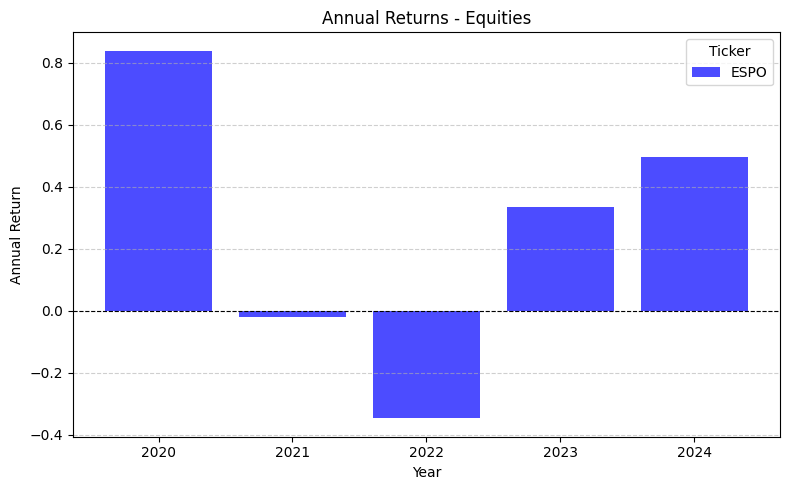

In [6]:
# Plot equities
plt.figure(figsize=(8, 5))
plt.bar(equities_returns.index.year, equities_returns[equities_ticker], color='blue', alpha=0.7, label=equities_ticker)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Annual Returns - Equities")
plt.xlabel("Year")
plt.ylabel("Annual Return")
plt.xticks(equities_returns.index.year)
plt.legend(title="Ticker")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

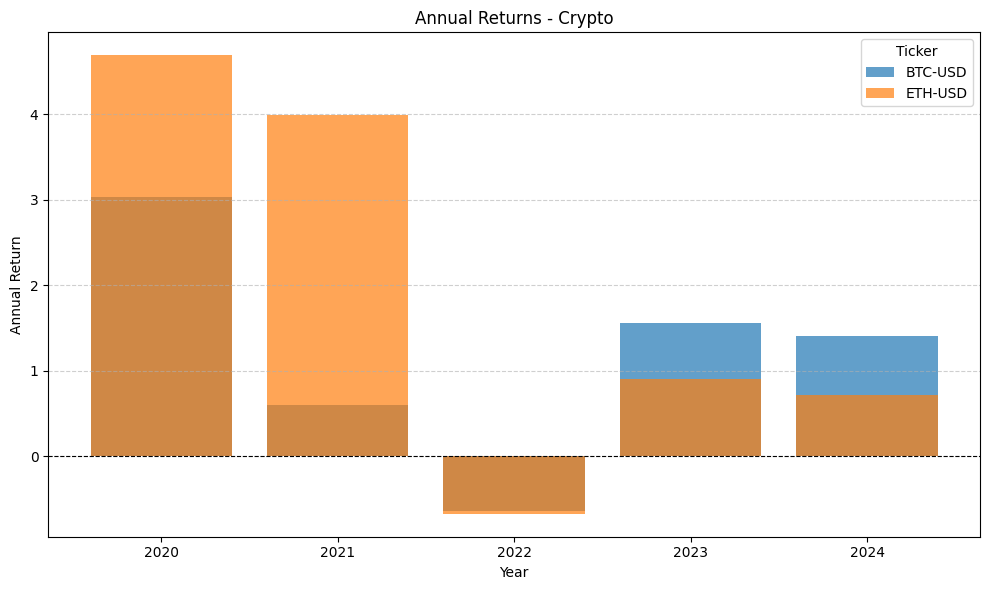

In [7]:
# Plot crypto
plt.figure(figsize=(10, 6))
for ticker in crypto_tickers:
    plt.bar(crypto_returns.index.year, crypto_returns[ticker], label=ticker, alpha=0.7)

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Annual Returns - Crypto")
plt.xlabel("Year")
plt.ylabel("Annual Return")
plt.xticks(crypto_returns.index.year)
plt.legend(title="Ticker")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()